# **Dog v/s Cat Classification**

**Transfer Learning:** It is a *Deep Learning technique* where we use a pre-trained model. This pre-trained model is trained for one task and can be re-trained for a similar task with a smaller dataset.

### **Setting Up Kaggle**

In [ ]:
!pip install kaggle

Upload 'kaggle.json' file in Google Colab

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

### **Importing Dataset from Kaggle and Extracting zip files**

In [ ]:
!kaggle competitions download -c dogs-vs-cats

 97% 790M/812M [00:04<00:00, 122MB/s] 
100% 812M/812M [00:04<00:00, 203MB/s]


In [ ]:
!ls

dogs-vs-cats.zip  kaggle.json  sample_data


In [ ]:
from zipfile import ZipFile
dataset = '/content/dogs-vs-cats.zip'

with ZipFile(dataset,'r') as zip:
    zip.extractall()
    print("Dataset Extracted successfully!")

Dataset Extracted successfully!


In [ ]:
from zipfile import ZipFile
train = '/content/train.zip'

with ZipFile(train,'r') as zip:
    zip.extractall()
    print("Training Dataset Extracted successfully!")

Training Dataset Extracted successfully!


In [ ]:
from zipfile import ZipFile
test = '/content/test1.zip'

with ZipFile(test,'r') as zip:
    zip.extractall()
    print("Testing Dataset Extracted successfully!")

Testing Dataset Extracted successfully!


### **Dataset Overview**

In [ ]:
import os

In [ ]:
path, dirs, files = next(os.walk("/content/train"))
file_count = len(files)
print(f"Total number of training images: {file_count}")

Total number of training images: 25000


In [ ]:
path, dirs, files = next(os.walk("/content/test1"))
file_count = len(files)
print(f"Total number of testing images: {file_count}")

Total number of testing images: 12500


In [ ]:
file_names = os.listdir('/content/train/')
print(file_names)

['dog.5595.jpg', 'dog.8004.jpg', 'dog.2863.jpg', 'cat.7288.jpg', 'dog.4092.jpg', 'cat.2327.jpg', 'dog.7187.jpg', 'cat.9378.jpg', 'cat.11065.jpg', 'dog.12383.jpg', 'cat.9568.jpg', 'dog.1597.jpg', 'dog.7831.jpg', 'dog.9037.jpg', 'cat.6314.jpg', 'dog.3514.jpg', 'dog.9728.jpg', 'cat.8194.jpg', 'cat.2325.jpg', 'dog.912.jpg', 'dog.452.jpg', 'dog.1709.jpg', 'cat.7213.jpg', 'dog.5397.jpg', 'dog.544.jpg', 'cat.3589.jpg', 'dog.4959.jpg', 'dog.4321.jpg', 'dog.1340.jpg', 'dog.1528.jpg', 'cat.5471.jpg', 'cat.8403.jpg', 'dog.11390.jpg', 'cat.7929.jpg', 'cat.11033.jpg', 'cat.10537.jpg', 'dog.11208.jpg', 'cat.1292.jpg', 'dog.10180.jpg', 'dog.5335.jpg', 'dog.4768.jpg', 'cat.10918.jpg', 'cat.2254.jpg', 'cat.5082.jpg', 'dog.6395.jpg', 'cat.11300.jpg', 'dog.2299.jpg', 'dog.4914.jpg', 'cat.1460.jpg', 'dog.4116.jpg', 'dog.3815.jpg', 'dog.9237.jpg', 'dog.8306.jpg', 'dog.10504.jpg', 'dog.11070.jpg', 'dog.6964.jpg', 'cat.8526.jpg', 'cat.5899.jpg', 'dog.6079.jpg', 'cat.580.jpg', 'dog.5541.jpg', 'dog.377.jpg', '

### **Importing Dependencies**

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

In [ ]:
import cv2
import glob

In [ ]:
import tensorflow as tf
from tensorflow import keras
import tensorflow_hub as hub

### **Displaying Images of Cats and Dogs**

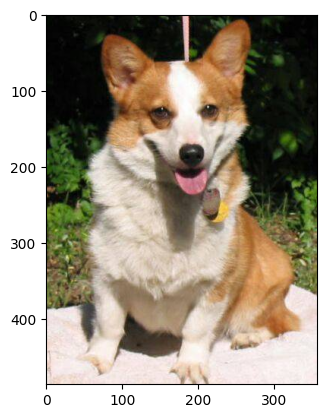

In [ ]:
dog_img = mpimg.imread('/content/train/dog.1528.jpg')
plt.imshow(dog_img)

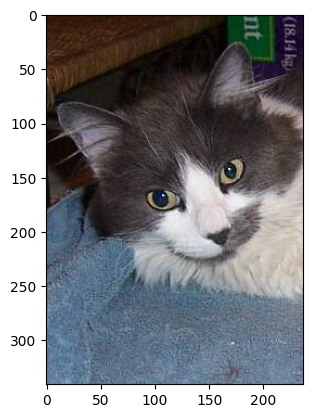

In [ ]:
cat_img = mpimg.imread('/content/train/cat.9378.jpg')
plt.imshow(cat_img)

### **Resizing all the Images**

In [ ]:
os.mkdir("/content/resized_images")

In [ ]:
original_folder = "/content/train/"
resized_folder = "/content/resized_images/"

In [ ]:
count = 0
for image_file in file_names:
    # Getting image path:
    img_path = original_folder + image_file

    # Take 5000 images from dataset
    if count >= 2000:
        break
    count += 1

    # Opening and resizing the image file
    img = Image.open(img_path)
    img = img.resize((224,224))
    img = img.convert('RGB')

    # Saving the image file
    save_path = resized_folder + image_file
    img.save(save_path)

In [ ]:
file_names = os.listdir("/content/resized_images")
print(f"Total number of resized images: {len(file_names)}")
print(file_names)

Total number of resized images: 2000
['dog.5595.jpg', 'dog.8004.jpg', 'dog.2863.jpg', 'cat.7288.jpg', 'dog.4092.jpg', 'cat.2327.jpg', 'dog.7187.jpg', 'cat.9378.jpg', 'cat.11065.jpg', 'dog.12383.jpg', 'cat.9568.jpg', 'dog.1597.jpg', 'dog.7831.jpg', 'dog.9037.jpg', 'cat.6314.jpg', 'dog.3514.jpg', 'dog.9728.jpg', 'cat.8194.jpg', 'cat.2325.jpg', 'dog.912.jpg', 'dog.452.jpg', 'dog.1709.jpg', 'cat.7213.jpg', 'dog.5397.jpg', 'dog.544.jpg', 'cat.3589.jpg', 'dog.4959.jpg', 'dog.4321.jpg', 'dog.1340.jpg', 'dog.1528.jpg', 'cat.5471.jpg', 'cat.8403.jpg', 'dog.11390.jpg', 'cat.7929.jpg', 'cat.11033.jpg', 'cat.10537.jpg', 'dog.11208.jpg', 'cat.1292.jpg', 'dog.10180.jpg', 'dog.5335.jpg', 'dog.4768.jpg', 'cat.10918.jpg', 'cat.2254.jpg', 'cat.5082.jpg', 'dog.6395.jpg', 'cat.11300.jpg', 'dog.2299.jpg', 'dog.4914.jpg', 'cat.1460.jpg', 'dog.4116.jpg', 'dog.3815.jpg', 'dog.9237.jpg', 'dog.8306.jpg', 'dog.10504.jpg', 'dog.11070.jpg', 'dog.6964.jpg', 'cat.8526.jpg', 'cat.5899.jpg', 'dog.6079.jpg', 'cat.580.j

### **Displaying Resized Images of Cats and Dogs**

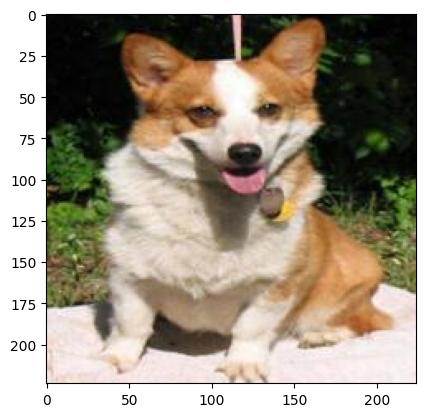

In [ ]:
dog_img_resized = mpimg.imread('/content/resized_images/dog.1528.jpg')
plt.imshow(dog_img_resized)

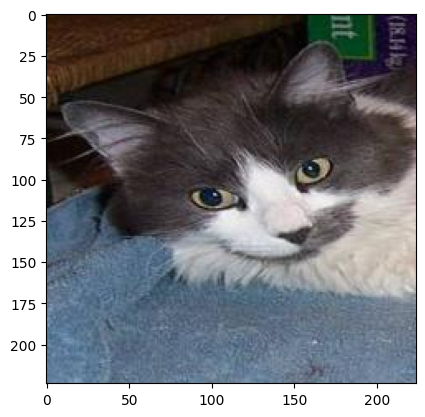

In [ ]:
cat_img_resized = mpimg.imread('/content/resized_images/cat.9378.jpg')
plt.imshow(cat_img_resized)

### **Labelling resized images of Cats and Dogs**

*   Cats: 0
*   Dogs: 1

In [ ]:
labels = []
file_names = os.listdir("/content/resized_images")

for img in file_names:
    if 'cat' in img:
        labels.append(0)
    else:
        labels.append(1)

In [ ]:
print("Image files: ", file_names)
print("Total number of image files: ", len(file_names))

Image files:  ['dog.5595.jpg', 'dog.8004.jpg', 'dog.2863.jpg', 'cat.7288.jpg', 'dog.4092.jpg', 'cat.2327.jpg', 'dog.7187.jpg', 'cat.9378.jpg', 'cat.11065.jpg', 'dog.12383.jpg', 'cat.9568.jpg', 'dog.1597.jpg', 'dog.7831.jpg', 'dog.9037.jpg', 'cat.6314.jpg', 'dog.3514.jpg', 'dog.9728.jpg', 'cat.8194.jpg', 'cat.2325.jpg', 'dog.912.jpg', 'dog.452.jpg', 'dog.1709.jpg', 'cat.7213.jpg', 'dog.5397.jpg', 'dog.544.jpg', 'cat.3589.jpg', 'dog.4959.jpg', 'dog.4321.jpg', 'dog.1340.jpg', 'dog.1528.jpg', 'cat.5471.jpg', 'cat.8403.jpg', 'dog.11390.jpg', 'cat.7929.jpg', 'cat.11033.jpg', 'cat.10537.jpg', 'dog.11208.jpg', 'cat.1292.jpg', 'dog.10180.jpg', 'dog.5335.jpg', 'dog.4768.jpg', 'cat.10918.jpg', 'cat.2254.jpg', 'cat.5082.jpg', 'dog.6395.jpg', 'cat.11300.jpg', 'dog.2299.jpg', 'dog.4914.jpg', 'cat.1460.jpg', 'dog.4116.jpg', 'dog.3815.jpg', 'dog.9237.jpg', 'dog.8306.jpg', 'dog.10504.jpg', 'dog.11070.jpg', 'dog.6964.jpg', 'cat.8526.jpg', 'cat.5899.jpg', 'dog.6079.jpg', 'cat.580.jpg', 'dog.5541.jpg', 'd

In [ ]:
print("Labels: ", labels)
print("Total number of labels: ", len(labels))

Labels:  [1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 

### **Image Processing**

In [ ]:
img_directory = "/content/resized_images/"
img_extension = ['png', 'jpg']

files = []
[files.extend(glob.glob(img_directory + '*.' + ext)) for ext in img_extension]
images = np.asarray([cv2.imread(file) for file in files])

In [ ]:
print(images)

[[[[ 79  68  71]
   [ 84  73  75]
   [ 84  71  73]
   ...
   [203 178 162]
   [197 171 155]
   [187 161 145]]

  [[ 73  61  67]
   [ 75  64  67]
   [ 75  64  66]
   ...
   [202 177 161]
   [197 171 155]
   [189 163 147]]

  [[ 66  55  63]
   [ 70  60  66]
   [ 72  63  66]
   ...
   [201 176 160]
   [197 172 156]
   [190 165 149]]

  ...

  [[184 166 159]
   [187 169 162]
   [190 172 165]
   ...
   [215 192 176]
   [212 189 173]
   [209 186 170]]

  [[188 169 161]
   [190 171 163]
   [192 173 165]
   ...
   [213 190 174]
   [208 185 169]
   [203 180 164]]

  [[194 174 163]
   [195 175 164]
   [196 176 165]
   ...
   [213 190 174]
   [206 183 167]
   [201 178 162]]]


 [[[149 161 203]
   [142 154 196]
   [126 140 182]
   ...
   [145 164 197]
   [142 161 194]
   [140 159 192]]

  [[152 164 206]
   [143 155 197]
   [124 138 180]
   ...
   [145 164 197]
   [143 162 195]
   [141 160 193]]

  [[151 163 205]
   [138 150 192]
   [117 131 173]
   ...
   [138 158 189]
   [137 157 188]
   [136 156

In [ ]:
print(f"Total number of images: {len(images)}")
print(f"Type: {type(images)}")
print("Shape of images: ", images.shape)

Total number of images: 2000
Type: <class 'numpy.ndarray'>
Shape of images:  (2000, 224, 224, 3)


The above shape of images ***(2000, 224, 224, 3)*** means that there are total *2000* image files present,

each of *224 x 224* **dimensions** and *3* represents **RGB** colour of images.

In [ ]:
X = images
Y = np.asarray(labels)

### **Training Testing Dataset Splitting**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=23)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


In [ ]:
X_train_scaled = X_train / 255

In [ ]:
X_test_scaled = X_test / 255

### **Building the Neural Network**

In [ ]:
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)

base_model.trainable = False

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
NUM_OF_CLASSES = 2

model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.Dense(NUM_OF_CLASSES)
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 1280)           │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2)              │         2,562 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,260,546 (8.62 MB)

 Trainable params: 2,562 (10.01 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [ ]:
model.fit(X_train_scaled, Y_train, epochs=5)

Epoch 1/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 74s 1s/step - accuracy: 0.8560 - loss: 0.3191
Epoch 2/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.9740 - loss: 0.0778
Epoch 3/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 66s 1s/step - accuracy: 0.9805 - loss: 0.0567
Epoch 4/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 68s 1s/step - accuracy: 0.9847 - loss: 0.0398
Epoch 5/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 68s 1s/step - accuracy: 0.9881 - loss: 0.0369


### **Model Accuracy Evaluation on Testing Dataset**

In [ ]:
score, acc = model.evaluate(X_test_scaled, Y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.9638 - loss: 0.0729


In [ ]:
print("Test loss: ", score)
print(f"Test accuracy: {acc:.2%}")

Test loss:  0.05933433398604393
Test accuracy: 97.00%


### **Making a Predictive System**

In [ ]:
def predict_image(img_path):
    # Read the image using cv2 library:
    img = cv2.imread(img_path)

    # Display the image:
    img_plot = plt.imshow(img)
    plt.show()

    # Image processing (resizing, scaling, reshaping):
    img_resized = cv2.resize(img, (224, 224))
    img_scaled = img_resized / 255
    imp_reshaped = np.reshape(img_scaled, [1, 224, 224, 3])

    # Making prediction using model:
    prediction = model.predict(imp_reshaped)
    pred_label = np.argmax(prediction)

    if pred_label == 0:
        print("The image is of a cat")
    else:
        print("The image is of a dog")

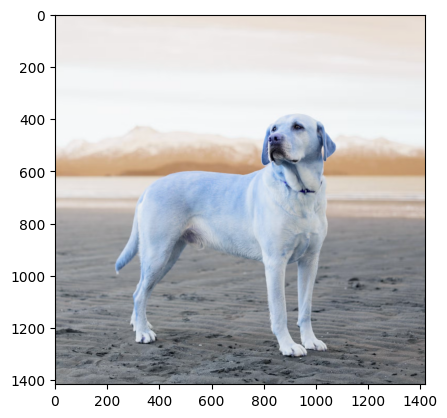

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
The image is of a dog


In [ ]:
predict_image("/content/dog.jpg")

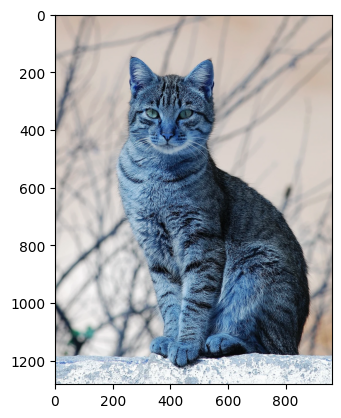

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
The image is of a cat


In [ ]:
predict_image("/content/cat.jpg")

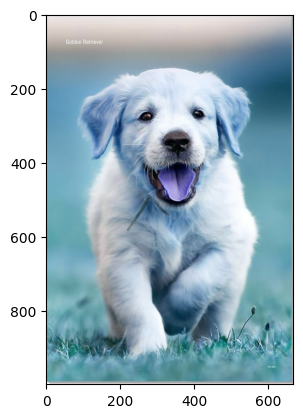

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
The image is of a dog


In [ ]:
predict_image("/content/dog1.jpg")

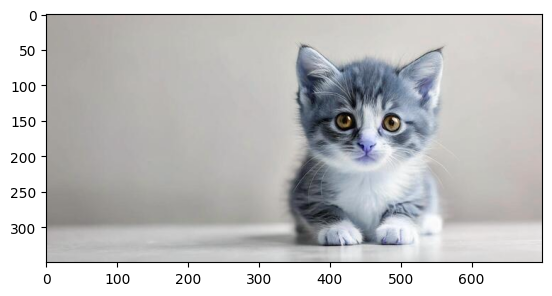

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
The image is of a cat


In [ ]:
predict_image("/content/cat1.jpg")